In [21]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [22]:
df = pd.read_excel('AMR POS 1 2024-25.xlsx')

In [23]:
df.head()

,Date,Voucher No,Voucher name,Phone Number,Created user,Account Name,Account2 Name,Item Code,Item HSN/SAC,Product,...,Net Per Quantity,CP,SP,MRP,Diff,Discount %,PR,Unit Name,Created time,Item Type
0,2024-04-01,PosSal : 24-25/KN1,POS Sales,9866660542,Counter A,Customer Default Account,Sales Account,KHA03281,85094090,PREETHI MIXIE POPULAR 750 MG-142,...,4750.0,4296.13,4750.0,6539.0,453.87,NaN,453.87,NOS,0.472558,MIXER
1,2024-04-01,PosSal : 24-25/KN1,POS Sales,9866660542,Counter A,Customer Default Account,Sales Account,KSP02115,73239390,SOLO SS - PEG MEASURER-STOUT-ROSE GOLD,...,200.0,129.73,200.0,229.0,70.27,NaN,140.54,NOS,0.472558,NaN
2,2024-04-01,PosSal : 24-25/KN1,POS Sales,9866660542,Counter A,Customer Default Account,Sales Account,KHM05212,73239390,SS BELL GLASS.2 NO.TT COLOUR,...,110.0,42.68,110.0,140.0,67.32,NaN,67.32,NOS,0.472558,BELL GLASS
3,2024-04-01,PosSal : 24-25/KN1,POS Sales,9866660542,Counter A,Customer Default Account,Sales Account,KSP02114,73239390,SOLO SS - PEG MEASURER-STOUT-GOLD,...,200.0,129.73,200.0,229.0,70.27,NaN,70.27,NOS,0.472558,NaN
4,2024-04-01,PosSal : 24-25/KP1,POS Sales,9642984969,Kukatpally1,Customer Default Account,Sales Account,KKA01995,741810,BRASS KHAL BATTA 2NO,...,1080.0,813.87,1080.0,1550.0,266.14,NaN,266.14,NOS,0.474410,KHAL BATTA


In [24]:
df.shape

(163424, 35)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163424 entries, 0 to 163423
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              163424 non-null  datetime64[ns]
 1   Voucher No        163424 non-null  object        
 2   Voucher name      163424 non-null  object        
 3   Phone Number      163424 non-null  int64         
 4   Created user      163424 non-null  object        
 5   Account Name      163424 non-null  object        
 6   Account2 Name     163424 non-null  object        
 7   Item Code         163424 non-null  object        
 8   Item HSN/SAC      163424 non-null  int64         
 9   Product           163424 non-null  object        
 10  Section           159652 non-null  object        
 11  Brand Name        162550 non-null  object        
 12  Outlet Name       163424 non-null  object        
 13  Quantity          163424 non-null  float64       
 14  Rate

In [26]:


# Assuming your data is in a DataFrame called 'df'
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format
df['Month-Year'] = df['Date'].dt.to_period('M')  # Extract month and year

# Group by 'Month-Year' and 'Outlet Name' and count unique customers
unique_customers = df.groupby(['Month-Year', 'Outlet Name'])['Phone Number'].nunique().reset_index()
unique_customers.columns = ['Month-Year', 'Outlet Name', 'Unique Customers']

print(unique_customers)




  Month-Year Outlet Name  Unique Customers
0    2024-04    KONDAPUR              1198
1    2024-04  Kukatpally              3631
2    2024-05    KONDAPUR               999
3    2024-05  Kukatpally              3337
4    2024-06    KONDAPUR              1836
5    2024-06  Kukatpally              3950
6    2024-07    KONDAPUR              2002
7    2024-07  Kukatpally              3726


# Finding Repeat Customers
 * Identify repeat customers by checking if the 'Phone Number' or 'Account Name' appears more than once.
 * Group by 'Outlet Name' to see how many times these customers visited.

In [27]:
# Count visits per customer
customer_visits = df.groupby(['Phone Number', 'Outlet Name']).size().reset_index(name='Visit Count')

# Filter for repeat customers
repeat_customers = customer_visits[customer_visits['Visit Count'] > 1]

# Count repeat customers per outlet
repeat_customers_per_outlet = repeat_customers.groupby('Outlet Name')['Phone Number'].nunique().reset_index()
repeat_customers_per_outlet.columns = ['Outlet Name', 'Repeat Customers']

print(repeat_customers_per_outlet)


  Outlet Name  Repeat Customers
0    KONDAPUR              5400
1  Kukatpally             11843


In [28]:

# Ensure correct date conversion
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format
df['Month-Year'] = df['Date'].dt.to_period('M')  # Extract month and year

# Count visits per customer, monthly and outlet-wise
customer_visits = df.groupby(['Phone Number', 'Month-Year', 'Outlet Name']).size().reset_index(name='Visit Count')

# Filter for repeat customers (who visited more than once in a month)
repeat_customers = customer_visits[customer_visits['Visit Count'] > 1]

# Count repeat customers per outlet, monthly-wise
repeat_customers_per_outlet = repeat_customers.groupby(['Month-Year', 'Outlet Name'])['Phone Number'].nunique().reset_index()
repeat_customers_per_outlet.columns = ['Month-Year', 'Outlet Name', 'Repeat Customers']

print(repeat_customers_per_outlet)


  Month-Year Outlet Name  Repeat Customers
0    2024-04    KONDAPUR              1112
1    2024-04  Kukatpally              3194
2    2024-05    KONDAPUR               913
3    2024-05  Kukatpally              2939
4    2024-06    KONDAPUR              1702
5    2024-06  Kukatpally              3523
6    2024-07    KONDAPUR              1855
7    2024-07  Kukatpally              3339


  Month-Year Outlet Name  Unique Customers  Repeat Customers
0    2024-04    KONDAPUR              1198              1112
1    2024-04  Kukatpally              3631              3194
2    2024-05    KONDAPUR               999               913
3    2024-05  Kukatpally              3337              2939
4    2024-06    KONDAPUR              1836              1702
5    2024-06  Kukatpally              3950              3523
6    2024-07    KONDAPUR              2002              1855
7    2024-07  Kukatpally              3726              3339


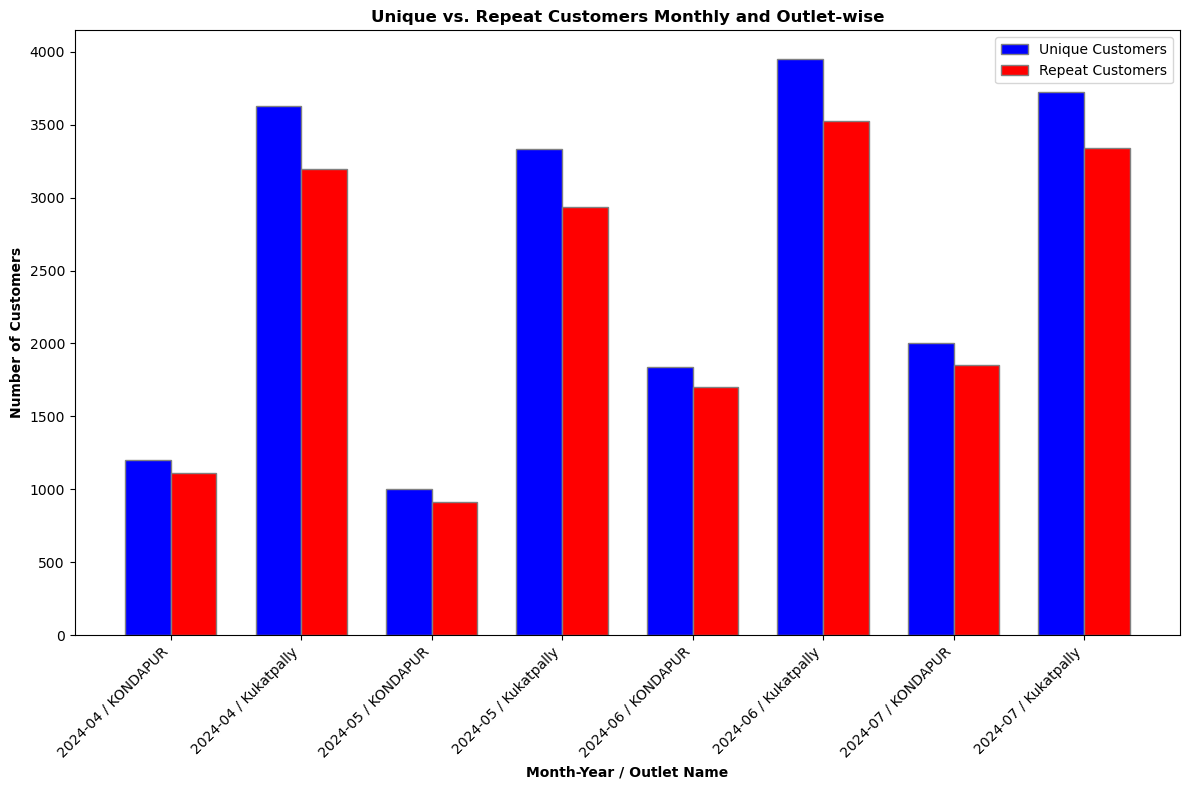

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])  
df['Month-Year'] = df['Date'].dt.to_period('M')  # Extract month and year

# Group by 'Month-Year' and 'Outlet Name' and count unique customers
unique_customers = df.groupby(['Month-Year', 'Outlet Name'])['Phone Number'].nunique().reset_index()
unique_customers.columns = ['Month-Year', 'Outlet Name', 'Unique Customers']

# Count visits per customer, monthly and outlet-wise
customer_visits = df.groupby(['Phone Number', 'Month-Year', 'Outlet Name']).size().reset_index(name='Visit Count')

# Filter for repeat customers (who visited more than once in a month)
repeat_customers = customer_visits[customer_visits['Visit Count'] > 1]

# Count repeat customers per outlet, monthly-wise
repeat_customers_per_outlet = repeat_customers.groupby(['Month-Year', 'Outlet Name'])['Phone Number'].nunique().reset_index()
repeat_customers_per_outlet.columns = ['Month-Year', 'Outlet Name', 'Repeat Customers']

# Merge the unique and repeat customer DataFrames
combined_df = pd.merge(unique_customers, repeat_customers_per_outlet, on=['Month-Year', 'Outlet Name'], how='left').fillna(0)

# Convert 'Repeat Customers' to integer for better display
combined_df['Repeat Customers'] = combined_df['Repeat Customers'].astype(int)

print(combined_df)

# Step 3: Plotting the clustered bar graph
# Set the width for each bar group
bar_width = 0.35

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Generate positions for the bars
r1 = range(len(combined_df))
r2 = [x + bar_width for x in r1]

# Plot unique customers
ax.bar(r1, combined_df['Unique Customers'], color='blue', width=bar_width, edgecolor='grey', label='Unique Customers')

# Plot repeat customers
ax.bar(r2, combined_df['Repeat Customers'], color='red', width=bar_width, edgecolor='grey', label='Repeat Customers')

# Add labels and title
ax.set_xlabel('Month-Year / Outlet Name', fontweight='bold')
ax.set_ylabel('Number of Customers', fontweight='bold')
ax.set_title('Unique vs. Repeat Customers Monthly and Outlet-wise', fontweight='bold')

# Add ticks and labels
ax.set_xticks([r + bar_width / 2 for r in range(len(combined_df))])
ax.set_xticklabels(combined_df['Month-Year'].astype(str) + ' / ' + combined_df['Outlet Name'], rotation=45, ha='right')

# Add legend
ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
